In [1]:
import matplotlib.pyplot as plot

/home/celik/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import numpy as np

In [9]:
a=np.random.uniform(size=(2,2))

In [10]:
a[1][1]

np.float64(0.8212171407885291)

In [11]:
a

array([[0.70406291, 0.9415533 ],
       [0.26998965, 0.82121714]])

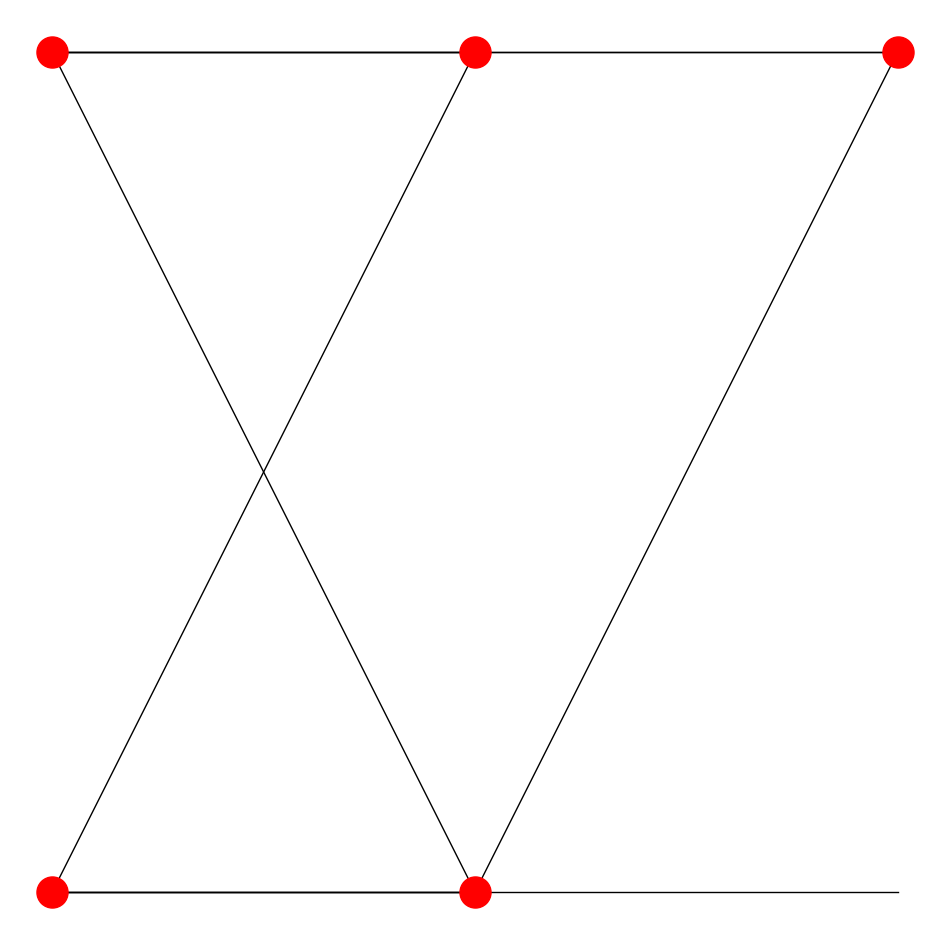

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sinir ağı yapısını çizme fonksiyonu
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    # Giriş ve katman nöronlarının koordinatlarını saklayın
    layer_top = [top - (i * v_spacing) for i in range(layer_sizes[0])]
    ax.scatter([left] * layer_sizes[0], layer_top, s=500, zorder=5, color='r')

    for n, layer_size in enumerate(layer_sizes[1:]):
        layer_top = [top - (i * v_spacing) for i in range(layer_size)]
        ax.scatter([left + h_spacing * (n + 1)] * layer_size, layer_top, s=500, zorder=5, color='r')
        for m in range(layer_sizes[n]):
            ax.plot([left, left + h_spacing * (n + 1)], [top - (m * v_spacing), top - (m * v_spacing)], 'k', lw=1, zorder=1)
            for j in range(layer_size):
                ax.plot([left + h_spacing * n, left + h_spacing * (n + 1)], [top - (m * v_spacing), top - (j * v_spacing)], 'k', lw=1, zorder=1)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 2, 1])
plt.show()


In [29]:
import numpy as np

# Sigmoid aktivasyon fonksiyonu ve türevi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Eğitim verisi ve etiketleri (örneğin, XOR kapısı)
girdi_verisi = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
etiketler = np.array([[0], [1], [1], [0]])

# Hiperparametreler
girdi_noron_sayisi = 2
gizli_noron_sayisi = 2
cikti_noron_sayisi = 1
ogrenme_orani = 0.1
epoch_sayisi = 10000

# Ağırlıkların ve önyargıların başlatılması
np.random.seed(1)
gizli_katman_agirliklari = np.random.uniform(size=(girdi_noron_sayisi, gizli_noron_sayisi))
gizli_katman_bias = np.random.uniform(size=(1, gizli_noron_sayisi))
cikti_katman_agirliklari = np.random.uniform(size=(gizli_noron_sayisi, cikti_noron_sayisi))
cikti_katman_bias = np.random.uniform(size=(1, cikti_noron_sayisi))

# Eğitim
for epoch in range(epoch_sayisi):
    # İleri besleme
    gizli_katman_giris = np.dot(girdi_verisi, gizli_katman_agirliklari) + gizli_katman_bias
    gizli_katman_cikis = sigmoid(gizli_katman_giris)
    
    cikti_katman_giris = np.dot(gizli_katman_cikis, cikti_katman_agirliklari) + cikti_katman_bias
    cikti_katman_cikis = sigmoid(cikti_katman_giris)
    
    # Hata hesaplama
    hata = etiketler - cikti_katman_cikis
    
    # Geri yayılım
    cikti_katman_hata = hata * sigmoid_derivative(cikti_katman_cikis)
    
    gizli_katman_hata = cikti_katman_hata.dot(cikti_katman_agirliklari.T) * sigmoid_derivative(gizli_katman_cikis)
    
    # Ağırlık ve önyargı güncelleme
    cikti_katman_agirliklari += gizli_katman_cikis.T.dot(cikti_katman_hata) * ogrenme_orani
    cikti_katman_bias += np.sum(cikti_katman_hata, axis=0, keepdims=True) * ogrenme_orani
    
    gizli_katman_agirliklari += girdi_verisi.T.dot(gizli_katman_hata) * ogrenme_orani
    gizli_katman_bias += np.sum(gizli_katman_hata, axis=0, keepdims=True) * ogrenme_orani

# Sonuç
print("Eğitim sonrası çıktı:")
print(cikti_katman_cikis)

# Yeni veri için tahmin yapma fonksiyonu
def tahmin_yap(girdi):
    gizli_katman_giris = np.dot(girdi, gizli_katman_agirliklari) + gizli_katman_bias
    gizli_katman_cikis = sigmoid(gizli_katman_giris)
    
    cikti_katman_giris = np.dot(gizli_katman_cikis, cikti_katman_agirliklari) + cikti_katman_bias
    cikti_katman_cikis = sigmoid(cikti_katman_giris)
    
    return cikti_katman_cikis

# Yeni veri ile tahmin yapma
yeni_girdi = np.array([[1, 1]])
tahmin = tahmin_yap(yeni_girdi)
print("Yeni girdi için tahmin:")
print(round(tahmin[0][0]))


Eğitim sonrası çıktı:
[[0.06368082]
 [0.94085536]
 [0.94108726]
 [0.06402009]]
Yeni girdi için tahmin:
0


In [24]:
round(0.6)

1

In [35]:
np.random.uniform(size=(1, gizli_noron_sayisi))

array([[0.19810149, 0.80074457]])

In [36]:
import numpy as np

# Sigmoid aktivasyon fonksiyonu
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Girdi verisi
x = np.array([0.5, 0.3])

# Ağırlıklar
w = np.array([0.4, 0.6])

# Önyargı
b = 0.1

# Önyargısız net girdi ve çıktı
z_no_bias = np.dot(x, w)
output_no_bias = sigmoid(z_no_bias)
print("Önyargısız çıktı:", output_no_bias)

# Önyargılı net girdi ve çıktı
z_with_bias = np.dot(x, w) + b
output_with_bias = sigmoid(z_with_bias)
print("Önyargılı çıktı:", output_with_bias)


Önyargısız çıktı: 0.5938731029341427
Önyargılı çıktı: 0.617747874769249


In [37]:
np.dot(x,w)

np.float64(0.38)

In [38]:
x+w

array([0.9, 0.9])

In [99]:
import numpy as np

# Sigmoid aktivasyon fonksiyonu ve türevi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Eğitim verisi (örneğin, rastgele veri kümesi)
girdi_verisi = np.random.rand(100, 2)  # 1000 örnek, her biri 10 boyutlu

# Hiperparametreler
girdi_noron_sayisi = girdi_verisi.shape[1]
gizli_noron_sayisi = 3
ogrenme_orani = 0.01
epoch_sayisi = 1

# Ağırlıkların ve önyargıların başlatılması
#np.random.seed(1)
gizli_katman_agirliklari = np.random.uniform(size=(girdi_noron_sayisi, gizli_noron_sayisi))
#print(gizli_katman_agirliklari)
gizli_katman_bias = np.random.uniform(size=(1, gizli_noron_sayisi))
cikti_katman_agirliklari = np.random.uniform(size=(gizli_noron_sayisi, girdi_noron_sayisi))
#print(cikti_katman_agirliklari)
cikti_katman_bias = np.random.uniform(size=(1, girdi_noron_sayisi))


def egit():
    
    global girdi_verisi 
    
    # Hiperparametreler
    global girdi_noron_sayisi 
    global gizli_noron_sayisi 
    global ogrenme_orani 
    global epoch_sayisi
    
    # Ağırlıkların ve önyargıların başlatılması
    #np.random.seed(1)
    global gizli_katman_agirliklari 
    #print(gizli_katman_agirliklari)
    global gizli_katman_bias 
    global cikti_katman_agirliklari 
    #print(cikti_katman_agirliklari)
    global cikti_katman_bias 

    
    for epoch in range(epoch_sayisi):
        # İleri besleme
        gizli_katman_giris = np.dot(girdi_verisi, gizli_katman_agirliklari) + gizli_katman_bias
        gizli_katman_cikis = sigmoid(gizli_katman_giris)
        
        cikti_katman_giris = np.dot(gizli_katman_cikis, cikti_katman_agirliklari) + cikti_katman_bias
        cikti_katman_cikis = sigmoid(cikti_katman_giris)
        
        # Hata hesaplama
        hata = girdi_verisi - cikti_katman_cikis
        
        # Geri yayılım
        cikti_katman_hata = hata * sigmoid_derivative(cikti_katman_cikis)
        
        gizli_katman_hata = cikti_katman_hata.dot(cikti_katman_agirliklari.T) * sigmoid_derivative(gizli_katman_cikis)
        
        # Ağırlık ve önyargı güncelleme
        cikti_katman_agirliklari += gizli_katman_cikis.T.dot(cikti_katman_hata) * ogrenme_orani
        cikti_katman_bias += np.sum(cikti_katman_hata, axis=0, keepdims=True) * ogrenme_orani
        
        gizli_katman_agirliklari += girdi_verisi.T.dot(gizli_katman_hata) * ogrenme_orani
        gizli_katman_bias += np.sum(gizli_katman_hata, axis=0, keepdims=True) * ogrenme_orani
    
    # Sonuç
    #print("Eğitim sonrası çıktı (ilk 5 örnek):")
    #print(cikti_katman_cikis[:5])
    
    # Yeni veri için tahmin yapma fonksiyonu
    def tahmin_yap(girdi):
        gizli_katman_giris = np.dot(girdi, gizli_katman_agirliklari) + gizli_katman_bias
        gizli_katman_cikis = sigmoid(gizli_katman_giris)
        
        cikti_katman_giris = np.dot(gizli_katman_cikis, cikti_katman_agirliklari) + cikti_katman_bias
        cikti_katman_cikis = sigmoid(cikti_katman_giris)
        
        return cikti_katman_cikis
    
    # Yeni veri ile tahmin yapma
    yeni_girdi = np.random.rand(1, 2)  # Rastgele yeni girdi
    #print(yeni_girdi)
    tahmin = tahmin_yap(yeni_girdi)
    #print("Yeni girdi için tahmin:")
    #print(tahmin)
    return abs(yeni_girdi-tahmin)

    girdi_verisi = np.random.rand(100, 2)  # 1000 örnek, her biri 10 boyutlu
egit()

[[0.37984506 0.477774  ]]
Yeni girdi için tahmin:
[[0.85087408 0.78057652]]


In [ ]:
error=[]

for i in range(200000000):
    error.append(egit())
egit()

[[0.79848394 0.25910087]]
Yeni girdi için tahmin:
[[0.63206357 0.57518493]]
[[0.72762396 0.37568779]]
Yeni girdi için tahmin:
[[0.61709355 0.57908977]]
[[0.08665532 0.28530711]]
Yeni girdi için tahmin:
[[0.59040384 0.5440246 ]]
[[0.25133551 0.24378435]]
Yeni girdi için tahmin:
[[0.58196213 0.54470721]]
[[0.70931292 0.67360183]]
Yeni girdi için tahmin:
[[0.58421907 0.55645488]]
[[0.18053141 0.07871902]]
Yeni girdi için tahmin:
[[0.56363393 0.51638986]]
[[0.00095773 0.39067465]]
Yeni girdi için tahmin:
[[0.55063091 0.51761132]]
[[0.53976456 0.91087343]]
Yeni girdi için tahmin:
[[0.54749875 0.53486788]]
[[0.06231582 0.09663315]]
Yeni girdi için tahmin:
[[0.52970116 0.49634729]]
[[0.10269902 0.95344423]]
Yeni girdi için tahmin:
[[0.52767471 0.50848513]]
[[0.84640404 0.47570343]]
Yeni girdi için tahmin:
[[0.52674878 0.52112096]]
[[0.30932905 0.1397335 ]]
Yeni girdi için tahmin:
[[0.52265135 0.49474789]]
[[0.92525233 0.17777538]]
Yeni girdi için tahmin:
[[0.5173513 0.5165724]]
[[0.50229185 0